# Notebook Imports And Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example 1 - A simple cost function 

 $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

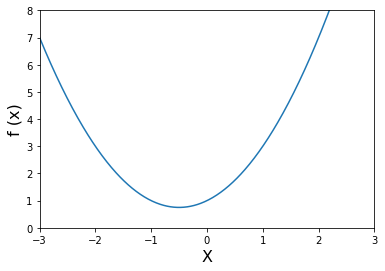

In [4]:
#Plot
plt.xlim([-3, 3])
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f (x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope And Derivatives
 Create a python function for the derivative of f(x) called df(x)

In [5]:
def df(x):
    return 2*x + 1

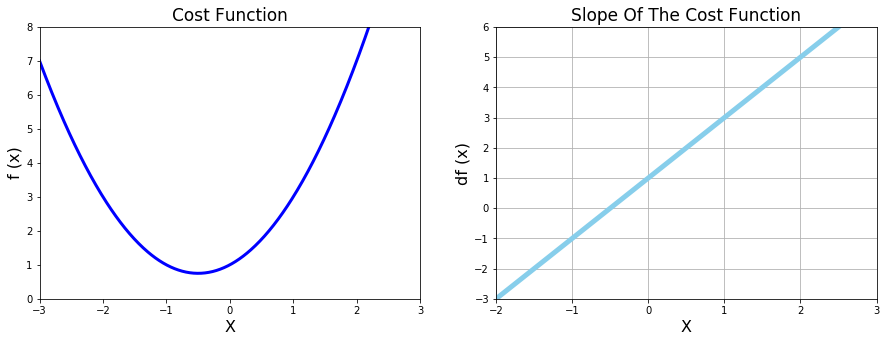

In [6]:
#Plot fuction and derivative side by side

plt.figure(figsize=[15, 5])

#1 Chart: Cost Function
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f (x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3)


# Chart: Derivative 
plt.subplot(1, 2, 2)

plt.title('Slope Of The Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df (x)', fontsize=16)
plt.grid()
plt.xlim([-2, 3])
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Python Loops And Gradient Descent


In [7]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(50):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 30
Local minimum occurs at: -0.4965337678900009
Slope or df(x) value at this point is 0.006932464219998158
f(x) value or cost at this point is: 0.7500120147650404


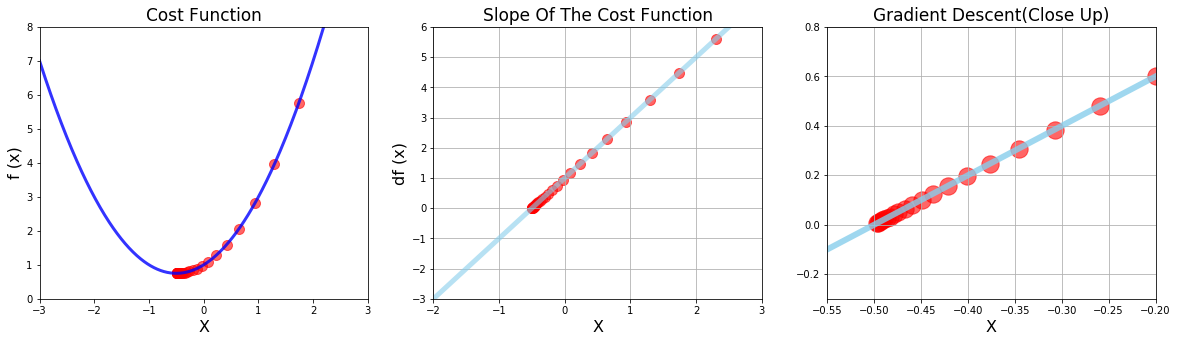

In [8]:
#Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

#1 Chart: Cost Function
plt.subplot(1, 3, 1)

plt.xlim([-3, 3])
plt.ylim(0, 8)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f (x)', fontsize=16)
plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)

plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)


#2 Chart: Derivative 
plt.subplot(1, 3, 2)

plt.title('Slope Of The Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df (x)', fontsize=16)
plt.grid()
plt.xlim([-2, 3])
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.6)

#3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent(Close Up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show()


# Example 2 - Multiple Minima Vs Initial Guess And Advanced Functions

$$g(x) = x^4 - 4x^2 + 5$$

In [9]:
# Make some data

x_2 = np.linspace(-2, 2, 1000)

In [10]:
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

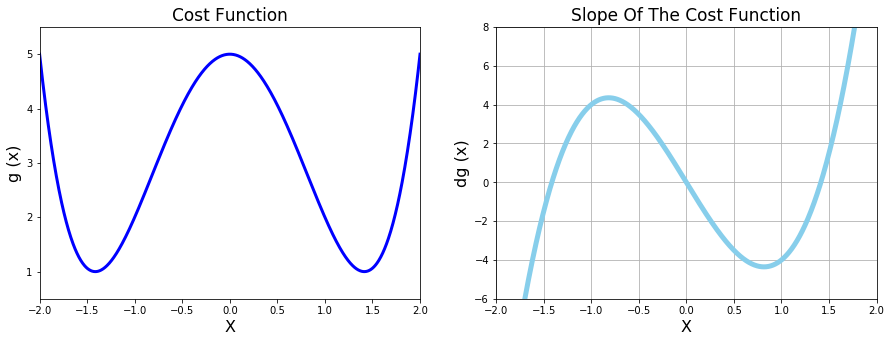

In [11]:
#Plot fuction and derivative side by side

plt.figure(figsize=[15, 5])

#1 Chart: Cost Function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g (x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3)


# Chart: Derivative 
plt.subplot(1, 2, 2)

plt.title('Slope Of The Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg (x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)

plt.show()

# Gradient Descent as a Python Function 

In [12]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):

    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
            
    return new_x, x_list, slope_list

In [13]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5)
print('Local min occcurs at', local_min)
print('Number of steps:', len(list_x))


Local min occcurs at 1.4122375085019094
Number of steps: 23


In [14]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.5, multiplier=0.01, precision=0.0001)
print('Local min occcurs at', local_min)
print('Number of steps:', len(list_x))


Local min occcurs at -1.4137636556157256
Number of steps: 56


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('Local min occcurs at', local_min)
print('Number of steps:', len(list_x))

Local min occcurs at -1.4120887490901561
Number of steps: 34


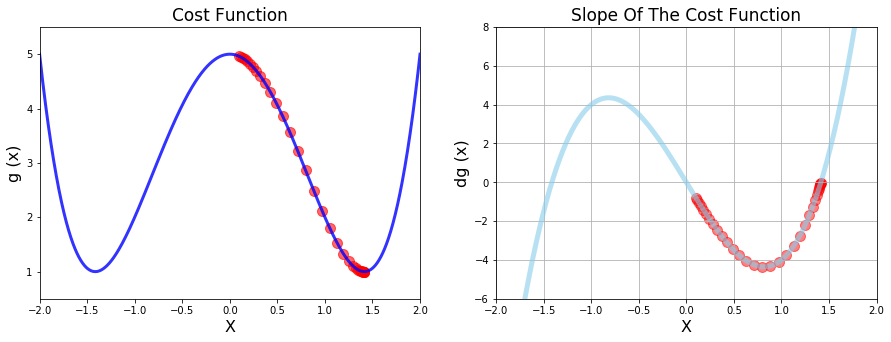

In [16]:
#Calling Gradient Descent Functions 
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.1)


#Plot fuction and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

#1 Chart: Cost Function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g (x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart: Derivative 
plt.subplot(1, 2, 2)

plt.title('Slope Of The Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg (x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples 

$$h(x) = x^5 - 2x^4 + 2$$

In [17]:
#Make data

x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

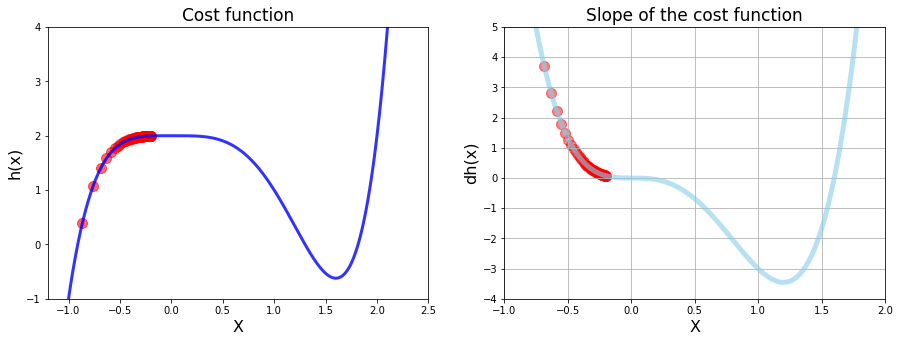

Local min occurs at:  -2071072.4470816324
Cost at this minimum is:  -3.810455326061589e+31
Number of steps:  71


In [18]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= -0.2, max_iter=70)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [19]:
import sys
# help sys
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

# The Learning Rate

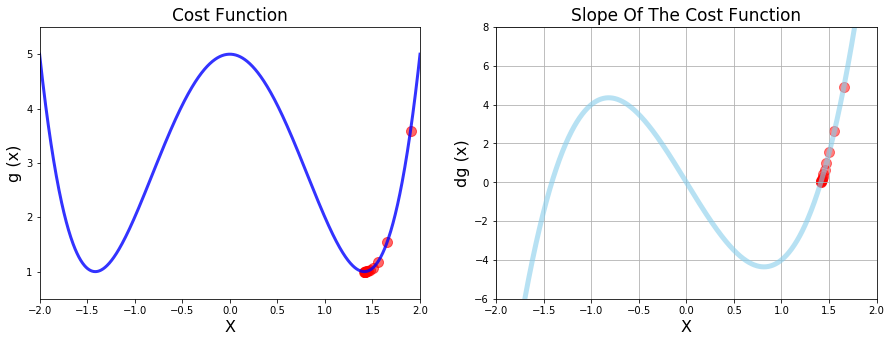

Number of steps: 14


In [20]:
#Calling Gradient Descent Functions 
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02,
                                                max_iter=500)


#Plot fuction and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

#1 Chart: Cost Function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g (x)', fontsize=16)
plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Chart: Derivative 
plt.subplot(1, 2, 2)

plt.title('Slope Of The Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg (x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps:', len(list_x))

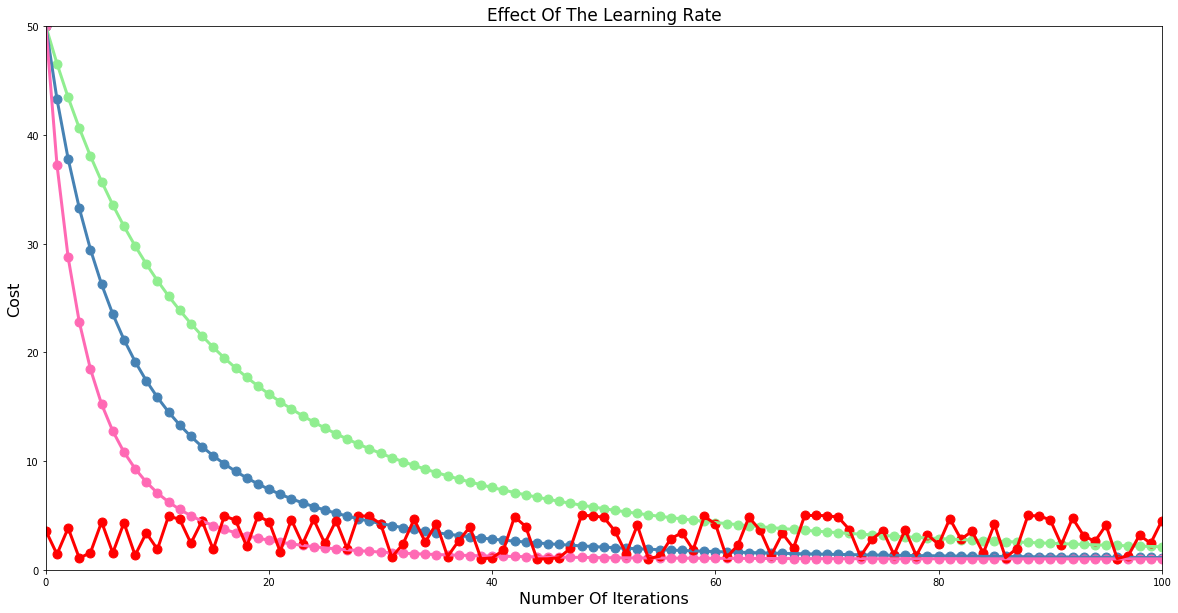

In [21]:
#Run Gradient Descent 3 times

n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005,
                             precision=0.0001, max_iter=n)


#Plotting reduction in cost for each iteration

plt.figure(figsize=[20, 10])

#1 Chart: Cost Function

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect Of The Learning Rate', fontsize=17)
plt.xlabel('Number Of Iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

#Values for our charts
#1 Y Axis Data: convert lists to numpy arrays

low_values = np.array(low_gamma[1])

#2 X Axis Data: create a list from 0 to n+1 

iteration_list = list(range(0, n+1))

#Plotting Low Learning Rate 

plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=3)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001,
                             precision=0.0001, max_iter=n)

#Plotting Mid Learning Rate 

mid_values = np.array(mid_gamma[1])

plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=3)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=80)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002,
                              precision=0.0001, max_iter=n)

#Plotting High Learning Rate 

high_values = np.array(high_gamma[1])

plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=3)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=80)

#Experiment

insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25,
                             precision=0.001, max_iter=n)

#Plotting insane Learning Rate 

insane_values = np.array(insane_gamma[1])

plt.plot(iteration_list, g(insane_values), color='red', linewidth=3)
plt.scatter(iteration_list, g(insane_values), color='red', s=80)


plt.show()

# Example 4 - Data Visualization with 3D Charts

## Minimise $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [22]:
def f(x, y):
    
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [23]:
# Make our x and y data

x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid:', x_4.shape)

Shape of X array (200,)
Array after meshgrid: (200, 200)


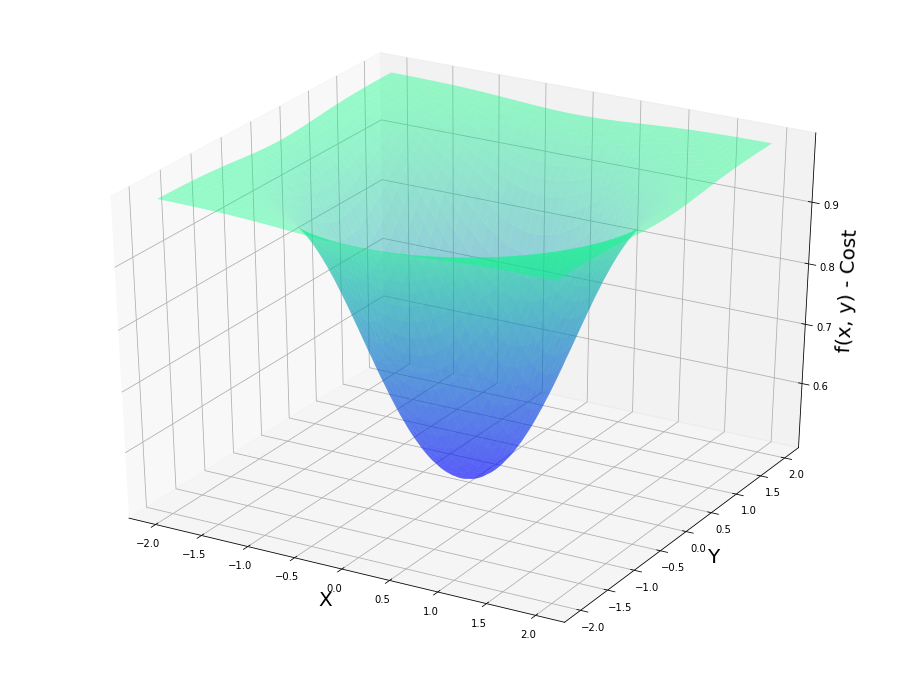

In [24]:
# Generating 3D Plot

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)


ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.winter, alpha=0.4)
plt.show()

## Partial Derivatives And Symbolic Computation

# $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2 }}{\left(3^{-x^2 - y^2} + 1 \right) ^2}$$

# $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2 }}{\left(3^{-x^2 - y^2} + 1 \right) ^2}$$

In [25]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a,b))
print('Partial derivative wrt x is: ', diff(f(a, b), a))
print('Value of f(x, y) at x=1.8 and y=1.0 is: ' ,f(a,b).evalf(subs={a:1.8, b :1.0}))
print('Value Of Partial derivative wrt x: ', diff(f(a,b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8 and y=1.0 is:  0.990604794032582
Value Of Partial derivative wrt x:  0.0368089716197505


## Batch Gradient Descent with Sympy

In [26]:
#Setup

multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradients =  np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results

print('Values in gradient array', gradients)
print('Minimum occcurs at x value of: ', params[0])
print('Minimum occcurs at y value of: ', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occcurs at x value of:  3.45838599885832e-11
Minimum occcurs at y value of:  1.92132555492129e-11
The cost is: 0.500000000000000


In [27]:
# Partial derivative functions Example 4

def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [28]:
#Setup

multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients =  np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results

print('Values in gradient array', gradients)
print('Minimum occcurs at x value of: ', params[0])
print('Minimum occcurs at y value of: ', params[1])
print('The cost is:', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occcurs at x value of:  3.458385998858304e-11
Minimum occcurs at y value of:  1.9213255549212797e-11
The cost is: 0.5


## Graphing 3D Gradient Decsent And Advanced Numpy Arrays

In [29]:
#Setup

multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) #initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients =  np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results

print('Values in gradient array', gradients)
print('Minimum occcurs at x value of: ', params[0])
print('Minimum occcurs at y value of: ', params[1])
print('The cost is:', f(params[0], params[1]))

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occcurs at x value of:  0.0007938985101347202
Minimum occcurs at y value of:  0.0004410547278526219
The cost is: 0.5000002265349848


In [30]:
#Advanced Numpy Array example

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]:  ', hs_band[0])
print('hs_band[0][1]:   ', hs_band[0][1])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

# the_roots = np.append(arr=hs_band, values=kirk.reshape(2,1), axis=1)
# print(the_roots)

print('Printing nicknames', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles..', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0]:   ['Black Thought' 'MC']
hs_band[0][1]:    MC
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames ['Black Thought' 'Questlove' 'Captain']
Printing band roles.. ['MC' 'Drums' 'Guitar' 'MC']


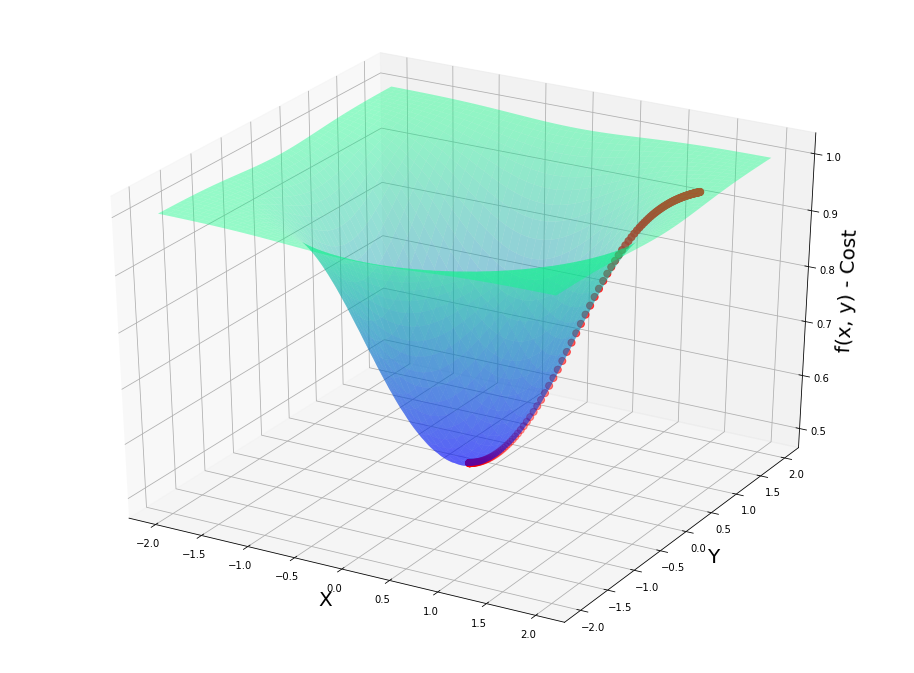

In [31]:
# Generating 3D Plot

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)


ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.winter, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]),
           s=50, color='red')

plt.show()

# Example 5 - Working With Data And A Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$

### $$MSE = \frac {1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [32]:
# Make Sample Data

x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [33]:
# Quick Linear Regression

regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


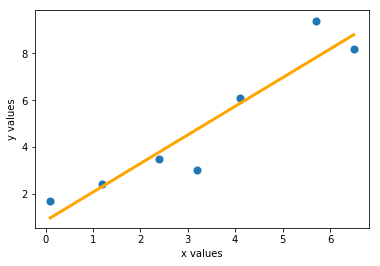

In [34]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [35]:
# y_hat = theta0 + theta1*x

y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print('Estimated values y_hat are: \n', y_hat)
print('In comparision, the actual values are \n', y_5)

Estimated values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparision, the actual values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [36]:
def mse(y, y_hat):
    #mse_cal = 1/7 * sum((y- y_hat)**2)
    #mse_cal = (1/y.size) * sum((y- y_hat)**2)
    mse_cal = np.average((y - y_hat)**2, axis=0)
    return mse_cal

In [37]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is:', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.9479655759794577
MSE regression is: 0.9479655759794577


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [38]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [39]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
    #print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
print('Shape Of plot_t0:', plot_t0.shape)
print('Shape Of plot_t1:', plot_t1.shape)
print('Shape Of plot_cost:', plot_cost.shape)

Shape Of plot_t0: (200, 200)
Shape Of plot_t1: (200, 200)
Shape Of plot_cost: (200, 200)


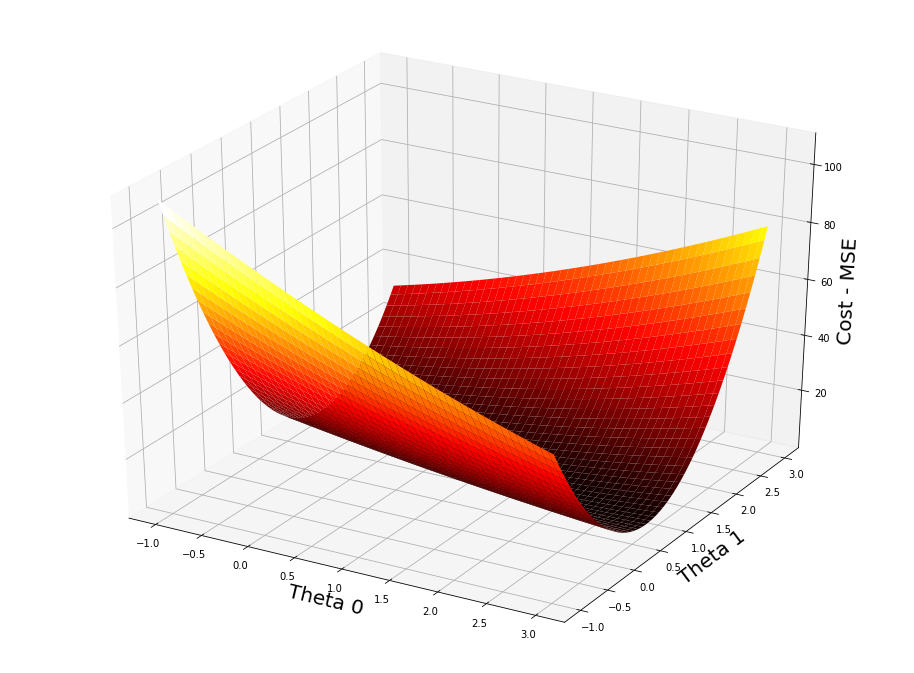

In [40]:
#Plotting Mean Squared Error

fig = plt.figure(figsize=[16,12])

ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [41]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min occurs at (i, j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]:', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]:', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i, j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91]: 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91]: 1.2311557788944723


## Partial Derivatives Of MSE wrt $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1} ^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$
 
## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1} ^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [42]:
def grad(x, y, thetas):
        n = y.size
        
        theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
        theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
        
        #return np.array([theta0_slope[0], theta1_slope[0]])
        #return np.append(arr=theta0_slope, values=theta1_slope)
        return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [45]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

#Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(10):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    #Append new values to numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))
print(plot_vals)

Min occurs at Theta 0: 2.380583406726276
Min occurs at Theta 1: 0.9315972179018776
MSE is: [1.65954617]
[[2.9        2.9       ]
 [2.74777143 2.2416    ]
 [2.64222994 1.79833515]
 [2.56818141 1.50011153]
 [2.51538182 1.29967163]
 [2.47692452 1.1651543 ]
 [2.44815295 1.07507868]
 [2.42592753 1.01496232]
 [2.40813148 0.97504115]
 [2.39333755 0.94873219]
 [2.38058341 0.93159722]]


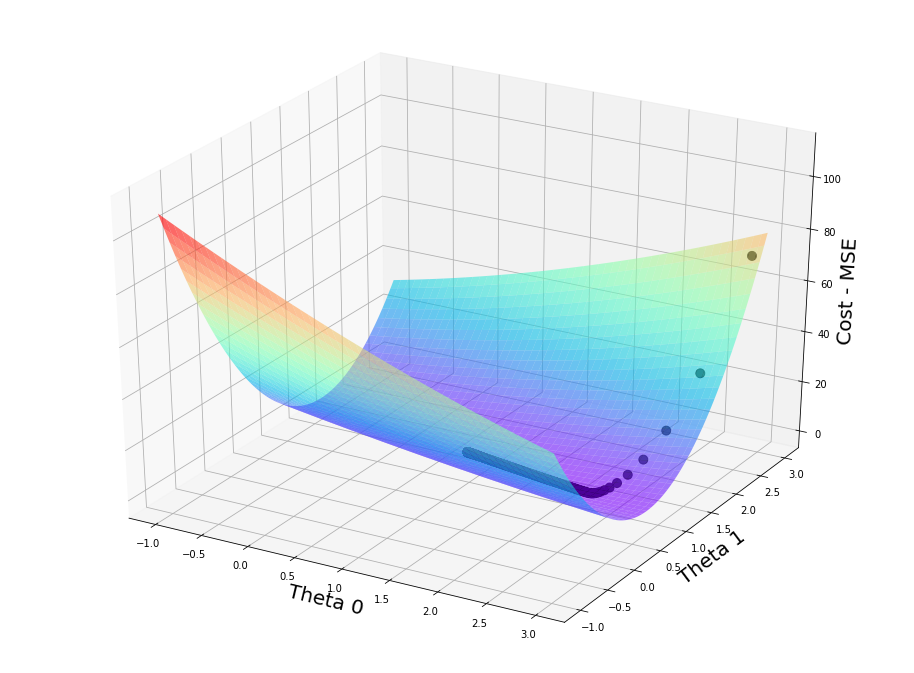

In [44]:
#Plotting Mean Squared Error

fig = plt.figure(figsize=[16,12])

ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.6)

plt.show()